In [1]:
from matplotlib import pyplot as plt

# Object Oriented Progamming in practice

The three principle benefits of OOP are:

### Encapsulation

* The separation of interface from implementation; the benevolent hiding of information.
* Examples:
  * A supermarket
    * **Implementation**: trucks, parking lot, shelves, refrigerators, stocking, cash registers, bakery, butcher, etc.
    * **Interface**: Shopping cart & grocery checker
  * Your teacher Brandon Martin-Anderson
    * **Implementation**: bones, organs, skin, lungs, circulating lungs, nerves, brain; a trillion cells each as complicated as the largest factory.
    * **Interface**: Talking; maybe email.
  * Air travel
    * **Implementation**: jet engines, fuel, airframes, avionics, ticketing systems, flight control, vacuuming the carpet in the airports.
    * **Interface**: Buying a ticket, doing the boarding dance.
  * You think of one.
  
Advantages: 
 * specialization 
  * (you don't need to know everything about a thing to use it)
 * replaceability 
  * (you can replace or upgrade a component on the fly).

### Polymorphism


* Treating different things the same way and expecting the same type of result.
* Examples:
  * Cars/trucks/go-karts/tractors
    * All have steering wheels, gas/brake pedals.
  * Shack/house/mansions
    * All have front doors, on which one usually knocks.
  * Purses/backpacks/tote bags
    * A concave place to put your stuff

* Think about the suffix "-able"
  * Storable
  * Rideable
  * Edible
  * Climbable
* These describe polymorphic systems of object classes

### ~~Inheritance~~



The most controversial and unevenly applied principle of OOP.

* Things behave like specialized versions of their parents. But, like, _philosophically_.
* Examples:
  * Animals: move and eat and reproduce
    * Mammals: all that, plus hair and live young
      * Primates: all that, plus large brains, dexterous hands, reliance on sight
        * Humans: all that, plus bipedal, large neocortex, extensive tool use, thin fur
  * Vehicles: mechanical, carry things
    * Motor vehicles: all that, and propelled by their own power plant
      * Cars: all that, and four wheels, principally carry passangers
        * Sedans: all that, and four doors, front hood, back trunk.

* Advantages
  * Built-in polymorphism.
  * Code re-use. Sometimes.
* Controversial
  * Ubiquitous in Java.
  * Optional in Python.

In practice, these principle are 
* subtle 
* complicated
* sometimes contradictory
* and difficult to apply

The best way to learn is by examples.

## Encapsulation example: reading from the web

Let's get a web site, using _functional_ idioms.

In [2]:
from urllib.request import urlopen

In [3]:
url = "https://www.spacejam.com/archive/spacejam/movie/jam.htm" #example.com is down

# just a function call
content = urlopen(url).read()

In [4]:
#look at content

Everything in Python is an object, so we can never really escape object-oriented code.

In [5]:
# content has a type
type(content)

bytes

In [6]:
# and attributes
print( dir(content) )

['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mod__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmod__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'capitalize', 'center', 'count', 'decode', 'endswith', 'expandtabs', 'find', 'fromhex', 'hex', 'index', 'isalnum', 'isalpha', 'isdigit', 'islower', 'isspace', 'istitle', 'isupper', 'join', 'ljust', 'lower', 'lstrip', 'maketrans', 'partition', 'replace', 'rfind', 'rindex', 'rjust', 'rpartition', 'rsplit', 'rstrip', 'split', 'splitlines', 'startswith', 'strip', 'swapcase', 'title', 'translate', 'upper', 'zfill']


Here's the same code, using OOP idioms.

In [7]:
from urllib.request import Request, urlopen

In [8]:
Request #what is this? what does the capital letter mean?

urllib.request.Request

In [9]:
type(Request)

type

Create a `Request` object. This encapsulates the **state** of an HTTP Request.

In [10]:
req = Request("https://www.spacejam.com/archive/spacejam/movie/jam.htm")

A function takes a `Request` instance, and returns an `HTTPResponse` instance.

In [11]:
resp = urlopen(req) #machinery kicks into gear here

In [12]:
resp # let's look at it

In [13]:
type(resp) #what type does it have?

http.client.HTTPResponse

The response is **not** the same thing as the contents of the web site. To get the contents, we need to explicitly call the `read()` method, in order to record the contents of the response.

In [14]:
contents = resp.read()

In [15]:
contents[0:1000]

b'<html>\n\n\n\n\n\n\n\n<!-- Copyright 1996 Warner Bros. Online -->\n\n\n\n\n\n\n\n<!-- Badda Bing, Badda Boom -->\n\n\n\n\n\n\n\n<head>\n\n\n\n<!-- Google Tag Manager -->\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\nj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n})(window,document,\'script\',\'dataLayer\',\'GTM-5M538Z5\');</script>\n<!-- End Google Tag Manager -->\n\n\n\n\n\n<title>Space Jam</title>\n\n\n\n<style type="text/css">\n  .footer-links {\n    margin: 5px;\n  }\n</style>\n\n\n\n\n\n\n\n</head>\n\n\n\n<body bgcolor="#000000" background="img/bg_stars.gif" text="#ff0000" link="#ff4c4c" vlink="#ff4c4c" alink="#ff4c4c">\n\n\n\n<!-- Google Tag Manager (noscript) -->\n<noscript><iframe src="https://www.googletagmanager.com/ns.html?id=GTM-5M538Z5"\nheight="0" width="0

**What's the good of that though?** Before we could read in one line, and now it takes four.

Check this out.

In [16]:
dict( resp.headers )

{'Content-Type': 'text/html',
 'Content-Length': '6418',
 'Connection': 'close',
 'Date': 'Wed, 08 May 2019 18:54:47 GMT',
 'Last-Modified': 'Fri, 21 Dec 2018 19:53:40 GMT',
 'ETag': '"c417c96c1473d2601581c685fcc782e8"',
 'Accept-Ranges': 'bytes',
 'Server': 'AmazonS3',
 'Age': '2136',
 'X-Cache': 'Hit from cloudfront',
 'Via': '1.1 225837527b3d85f48a3c60b7f9dcad16.cloudfront.net (CloudFront)',
 'X-Amz-Cf-Id': 'vy8MR-uK4P-eHhBaX9Fk6UwWRDlkXwAPscnENEWRhUJTZrHKVKBOqA=='}

In [17]:
resp.status

200

An HTTP response is more than just its content. There is a dictionary of metadata, called **headers**, and a **status code**.

By using object-oriented idioms we're able to faithfully model the subtleties of the HTTP protocol.

* An HTTP Request is assembled, containing data and metadata about the request
* It is submitted to a remote server
* Which returns an HTTP Response, containing data and metadata about the response

In this case, each object **encapsulates** the **state** of the HTTP request and response objects.

## Polymorphism: sampling from distributions

Numpy provides non-OOP functions for drawing from a distribution. Here we draw from a normal distribution:

In [18]:
import numpy as np

np.random.normal(loc=15.0, scale=5.0)

12.146011825839931

In [19]:
import scipy.stats as scs

In [20]:
dist = scs.norm(loc=15.0, scale=5.0)

In [21]:
# what's this?
dist

In [22]:
# what's its type?
type(dist)

scipy.stats._distn_infrastructure.rv_frozen

In [23]:
dist.rvs()

19.93462305287995

In [24]:
dist.rvs(10)

array([22.41247884, 22.3803829 , 12.34724192, 15.3111615 , 20.81900172,
        9.26293457, 11.41770065, 11.7887833 , 13.49008212, 18.8676881 ])

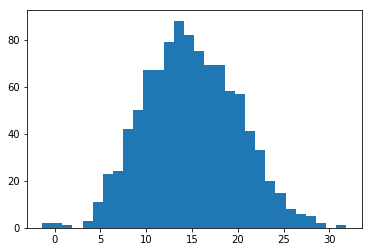

In [25]:


plt.hist( dist.rvs(1000), bins=30 )
plt.show()

It does a whole lot more though.

In [26]:
dist.pdf(15) #probability distribution function

0.07978845608028654

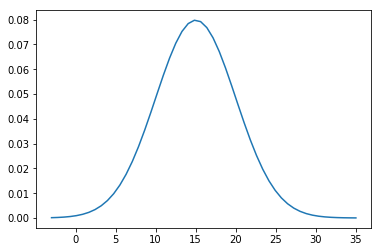

In [27]:
x = np.linspace(-3,35)
y = dist.pdf(x)
plt.plot(x,y)

Or maybe the cumulative distribution function??

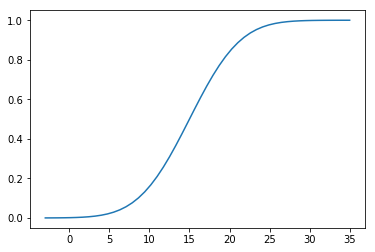

In [28]:
x = np.linspace(-3,35)
y = dist.cdf(x) #CDF!!
plt.plot(x,y)

`scipy.stats` provides a large set of distributions with a consistent interface.

Here's a beta distribution:

In [29]:
beta_dist = scs.beta(a=2, b=2)

In [30]:
beta_dist.pdf(0.5)

1.5

In [31]:
beta_dist.cdf(0.5)

0.5

In [32]:
#beta_dist. #hit tab

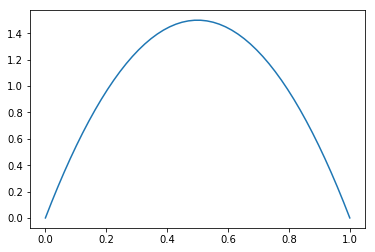

In [33]:
x = np.linspace(0,1)
y = beta_dist.pdf(x)
plt.plot(x,y)
plt.show()

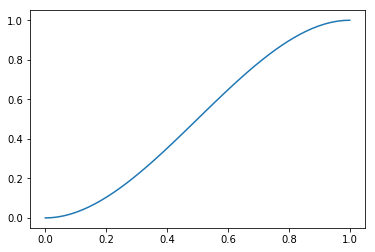

In [34]:
x = np.linspace(0,1)
y = beta_dist.cdf(x)
plt.plot(x,y)
plt.show()

The consistent use of a single interface with many types of distribution is an example of **polymorphism** in action.

## Interface inheritence example: `sklearn` models

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import pandas as pd

In [36]:
boston_bunch = load_boston()
boston = pd.DataFrame(boston_bunch.data, columns=boston_bunch.feature_names)
boston["MEDV"] = boston_bunch.target

In [37]:
boston = boston.sample(frac=1) #randomize

Text(0, 0.5, 'Average home price (000 $)')

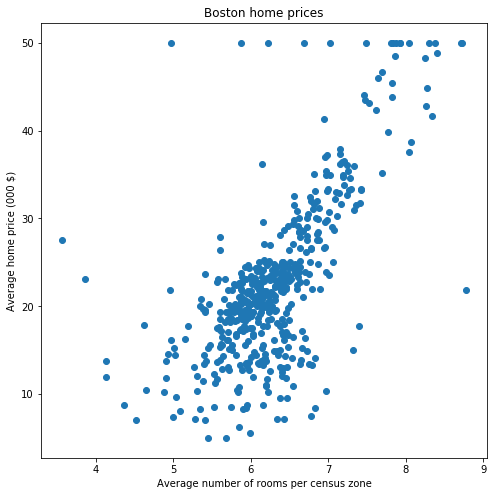

In [38]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter( boston["RM"], boston["MEDV"] )
ax.set_title("Boston home prices")
ax.set_xlabel("Average number of rooms per census zone")
ax.set_ylabel("Average home price (000 $)")

In [39]:
train_n = int(len(boston)*0.6)
X = boston[["RM"]]
y = boston["MEDV"]
X_train, X_test = X[:train_n], X[train_n:]
y_train, y_test = y[:train_n], y[train_n:]

In [40]:
linmodel = LinearRegression()
linmodel.fit(X_train, y_train)
yhat = linmodel.predict(X_test)

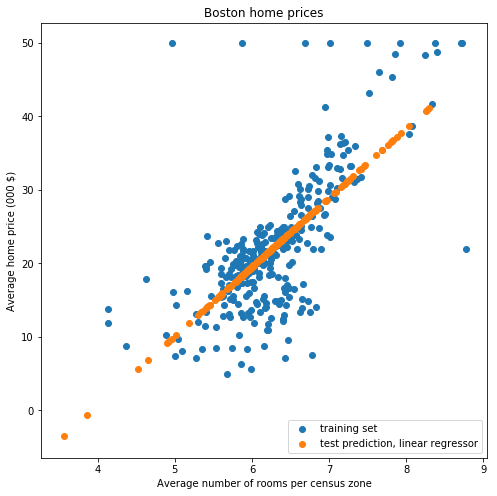

In [41]:
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(X_train, y_train, label="training set")
plt.scatter(X_test, yhat, label="test prediction, linear regressor")
ax.set_title("Boston home prices")
ax.set_xlabel("Average number of rooms per census zone")
ax.set_ylabel("Average home price (000 $)")
ax.legend()

In [94]:
from sklearn.base import BaseEstimator

class CharlesRiverRegressor(BaseEstimator):
    def fit(self, X, y=None):
        self.prices = {}
        self.prices[0] = y[ X["CHAS"]==0.0 ].mean()
        self.prices[1] = y[ X["CHAS"]==1.0 ].mean()
    
    def predict(self, X):
        return [self.prices[ x ] for x in X["CHAS"].astype(int)]

In [95]:
train_n = int(len(boston)*0.6)
X = boston.drop("MEDV",axis=1)
y = boston["MEDV"]
X_train, X_test = X[:train_n], X[train_n:]
y_train, y_test = y[:train_n], y[train_n:]

In [96]:
model = CharlesRiverRegressor()
model.fit(X_train,y_train)

In [97]:
model.prices

{0: 21.612142857142864, 1: 30.004347826086963}

In [98]:
yhat = model.predict(X_test)

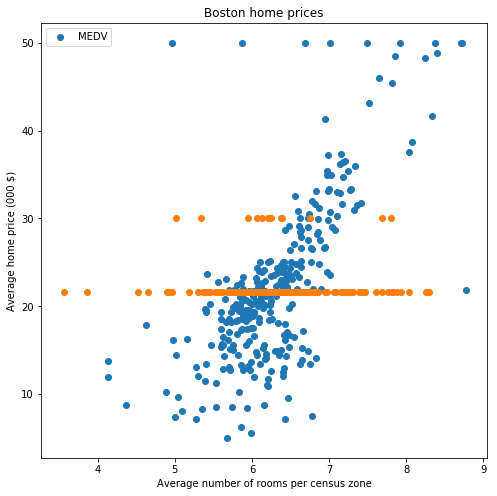

In [99]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter( X_train.RM, y_train )
ax.scatter( X_test.RM, yhat )
ax.set_title("Boston home prices")
ax.set_xlabel("Average number of rooms per census zone")
ax.set_ylabel("Average home price (000 $)")
ax.legend()

In [100]:
from sklearn.model_selection import cross_val_score


In [101]:
cross_val_score(linmodel, X, y, cv=5, scoring="neg_mean_squared_error").mean()

-24.10263186655353

In [102]:
cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error").mean()

-82.6244589487662